In [221]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',encoding="latin1")
# df = df.drop(columns=['UserName','ScreenName','Location','TweetAt'])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [222]:
for i in range(0,len(df)):
    if(df['Sentiment'][i]=='Extremely Negative'):
        df['Sentiment'][i]='Negative'
    elif(df['Sentiment'][i]=='Extremely Positive'):
        df['Sentiment'][i]='Positive'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [223]:
print(df['Sentiment'].unique())
df['Sentiment'].isna().sum()

['Neutral' 'Positive' 'Negative']


0

In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sentiment']=le.fit_transform(df['Sentiment'])
y=pd.get_dummies(df['Sentiment'])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [225]:
n=0
ne=0
p=0

for i in range(0,len(df)):
    if(df['Sentiment'][i]==0):
        n=n+1
    elif(df['Sentiment'][i]==1):
        ne=ne+1
    elif(df['Sentiment'][i]==2):
        p=p+1

In [226]:
print('Total Labels belonging to Negative Category are ',n)
print('Total Labels belonging to Neutral Category are ',ne)
print('Total Labels belonging to Positive Category are ',p)
print('Total entries in the train dataset is ',len(df))

Total Labels belonging to Negative Category are  15398
Total Labels belonging to Neutral Category are  7713
Total Labels belonging to Positive Category are  18046
Total entries in the train dataset is  41157


In [227]:
X=df.iloc[:,4]

In [228]:
from sklearn.model_selection import train_test_split
train_text,validation_text,train_labels,validation_labels=train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.2,random_state=42)

In [229]:
import re
import string
import random

In [230]:
for i in range(0,len(train_text)):
    temp=train_text[i]
    temp=re.sub("@\S+", " ", temp)
    temp=re.sub("https*\S+", " ", temp)
    temp=re.sub("#\S+", " ", temp)
    temp=re.sub("\'\w+", '', temp)
    temp=re.sub('[%s]' % re.escape(string.punctuation), ' ', temp)
    temp=re.sub(r'\w*\d+\w*', '', temp)
    temp=re.sub('\s{2,}', " ", temp)
    train_text[i]=temp

In [231]:
for i in range(0,len(validation_text)):
    temp=validation_text[i]
    temp=re.sub("@\S+", " ", temp)
    temp=re.sub("https*\S+", " ", temp)
    temp=re.sub("#\S+", " ", temp)
    temp=re.sub("\'\w+", '', temp)
    temp=re.sub('[%s]' % re.escape(string.punctuation), ' ', temp)
    temp=re.sub(r'\w*\d+\w*', '', temp)
    temp=re.sub('\s{2,}', " ", temp)
    validation_text[i]=temp

In [232]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8 and logs.get('val_accuracy')>0.8):
      print("\nAkurasi telah mencapai >80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [233]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sum_length_of_tweet=0
for i in X:
    temp=i
    sum_length_of_tweet=sum_length_of_tweet+len(temp.split())

tokenizer=Tokenizer(num_words=5000,oov_token='</OOV>')
tokenizer.fit_on_texts(train_text)
train_text_sequences=tokenizer.texts_to_sequences(train_text)
 
train_text_padded=pad_sequences(train_text_sequences,maxlen=max_length,padding='post')
validation_text_sequences=tokenizer.texts_to_sequences(validation_text)
validation_text_padded=pad_sequences(validation_text_sequences,maxlen=max_length,padding='post')
 
# padded_latih = pad_sequences(sekuens_latih) 
# padded_test = pad_sequences(sekuens_test)

In [234]:
max_length=round(sum_length_of_tweet/len(X))
print(max_length)

31


In [235]:
train_text_padded.shape[1]

31

In [236]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000,128,input_length=train_text_padded.shape[1]),    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 31, 128)           640000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 31, 128)           98816     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 520       
_________________________________________________________________
dropout_21 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)              

In [237]:
history=model.fit(train_text_padded,train_labels,epochs=10,
                      validation_data=(validation_text_padded,validation_labels),callbacks=[callbacks])

Epoch 1/10
1029/1029 [==============================] - 82s 74ms/step - loss: 0.8116 - accuracy: 0.6168 - val_loss: 0.5039 - val_accuracy: 0.8157
Epoch 2/10
1029/1029 [==============================] - 75s 72ms/step - loss: 0.5197 - accuracy: 0.8228 - val_loss: 0.4580 - val_accuracy: 0.8366

Akurasi telah mencapai >80%!


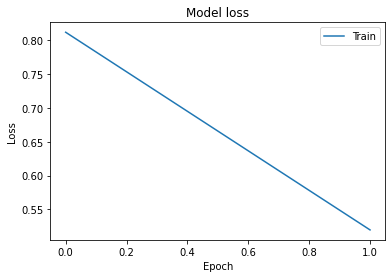

In [240]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

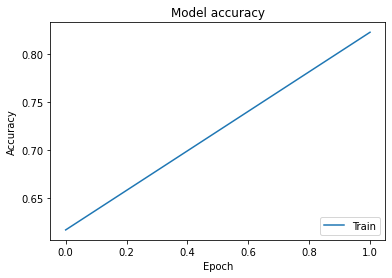

In [241]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

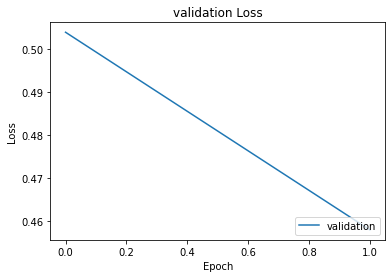

In [242]:
plt.plot(history.history['val_loss'])
plt.title('validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['validation'], loc='lower right')
plt.show()

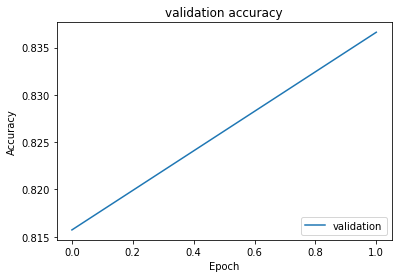

In [243]:
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['validation'], loc='lower right')
plt.show()

In [ ]:
print('Nama                 : Muhammad Amien Ramdhani')
print('Username dicoding    : amienramdhani')
print('email                : dhanimacbull@gmail.com')
print('No telepon           : 085797249521')
print('Kota domisili        : Kabupaten Cirebon')
print('Tempat Tanggal Lahir : Jakarta,08 Desember 2001')
print('Pendidikan terakhir  : Diploma-II di Pesantren Teknologi Informasi dan komunikasi(PeTIK) Depok')
print('Pendidikan Sekarang  : STT Terpadu Nurul Fikri Depok')